# Deep Learning
## Practice Projects
# P3: Parts of Speech
## Step 0. Style and Libraries

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;} 
h2, h3 {color: slategray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #ccc;}
h4 {color: #348ABD; font-family: 'Orbitron';}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: slategrey;}                        
</style>
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: #348ABD; background: aliceblue; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>                  


In [2]:
hide_code = ''
import numpy 
import pandas

from sklearn.feature_extraction.text import CountVectorizer

import pylab as plt
from matplotlib import cm

import seaborn
from wordcloud import WordCloud

%matplotlib inline

## Step 1. Load and Explore the Data

In [53]:
hide_code
# Read the data
data_russian = pandas.read_csv('data/parts_of_speech_russian.csv')
data_russian.head()

,sentences,parts_of_speech
0,археологи находят в славянских землях много кл...,существительное глагол предлог прилагательное ...
1,но главной составляющей магмы является окись к...,союз прилагательное существительное существите...
2,понаблюдайте за своими товарищами во время дис...,глагол предлог местоимение существительное пре...
3,в тех комнатах мебель закрыта была чехлами,предлог местоимение существительное существите...
4,в определённых случаях существование такой зав...,предлог прилагательное существительное существ...


In [54]:
hide_code
# Read the data
data_physics = pandas.read_csv('data/parts_of_speech_physics.csv')
data_physics.head()

,sentences,parts_of_speech
0,понятиями физики пользуются в любом разделе ес...,существительное существительное глагол предлог...
1,перед вами постепенно предстанет общая картина...,предлог местоимение наречие глагол прилагатель...
2,люди придумывали разнообразные мифы о возникно...,существительное глагол прилагательное существи...
3,человечество вступило на путь научного познани...,существительное глагол предлог существительное...
4,люди приступили к экспериментированию с физиче...,существительное глагол предлог существительное...


In [55]:
hide_code
# Create an array from words
words_russian = numpy.array([sentence.split() for sentence in data_russian['sentences']])
words_russian = words_russian.reshape(words_russian.shape[0]*words_russian.shape[1])
words_russian[:7]

array(['археологи', 'находят', 'в', 'славянских', 'землях', 'много',
       'кладов'], dtype='<U14')

In [56]:
hide_code
# Create an array from parts of speech
parts_of_speech_russian = \
numpy.array([sentence.split() for sentence in data_russian['parts_of_speech']])
parts_of_speech_russian = \
parts_of_speech_russian.reshape(parts_of_speech_russian.shape[0]*parts_of_speech_russian.shape[1])
parts_of_speech_russian[:7]

array(['существительное', 'глагол', 'предлог', 'прилагательное',
       'существительное', 'числительное', 'существительное'], dtype='<U15')

In [57]:
hide_code
# Create an array from words
words_physics = numpy.array([sentence.split() for sentence in data_physics['sentences']])
words_physics = words_physics.reshape(words_physics.shape[0]*words_physics.shape[1])
words_physics[:7]

array(['понятиями', 'физики', 'пользуются', 'в', 'любом', 'разделе',
       'естествознания'], dtype='<U19')

In [58]:
hide_code
# Create an array from parts of speech
parts_of_speech_physics = \
numpy.array([sentence.split() for sentence in data_physics['parts_of_speech']])
parts_of_speech_physics = \
parts_of_speech_physics.reshape(parts_of_speech_physics.shape[0]*parts_of_speech_physics.shape[1])
parts_of_speech_physics[:7]

array(['существительное', 'существительное', 'глагол', 'предлог',
       'местоимение', 'существительное', 'существительное'], dtype='<U15')

In [59]:
hide_code
# Display statistics / Russian
print('Dataset Statistics. Russian')
print('Number of sentences: {}'.format(len(data_russian['sentences'])))
print('Number of words: {}'.format(len(words_russian)))
print('Parts of speech:', set(parts_of_speech_russian))

Dataset Statistics. Russian
Number of sentences: 110
Number of words: 770
Parts of speech: {'существительное', 'союз', 'наречие', 'числительное', 'частица', 'прилагательное', 'деепричастие', 'местоимение', 'глагол', 'предлог', 'причастие'}


In [60]:
hide_code
# Display statistics / Physics
print('Dataset Statistics. Physics')
print('Number of sentences: {}'.format(len(data_physics['sentences'])))
print('Number of words: {}'.format(len(words_physics)))
print('Parts of speech:', set(parts_of_speech_physics))

Dataset Statistics. Physics
Number of sentences: 6
Number of words: 42
Parts of speech: {'существительное', 'наречие', 'прилагательное', 'местоимение', 'глагол', 'предлог', 'причастие'}


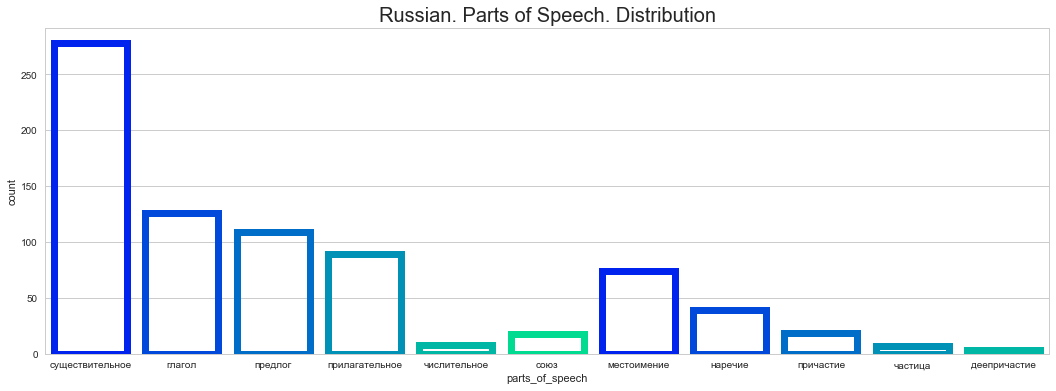

In [61]:
hide_code
# Create the dataframe
df_russian = pandas.DataFrame({'parts_of_speech': parts_of_speech_russian,
                               'words': words_russian})
# Plot distribution
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", data=df_russian,
                  facecolor=(0, 0, 0, 0), linewidth=7,
                  edgecolor=seaborn.color_palette("winter"))
plt.title('Russian. Parts of Speech. Distribution', fontsize=20);

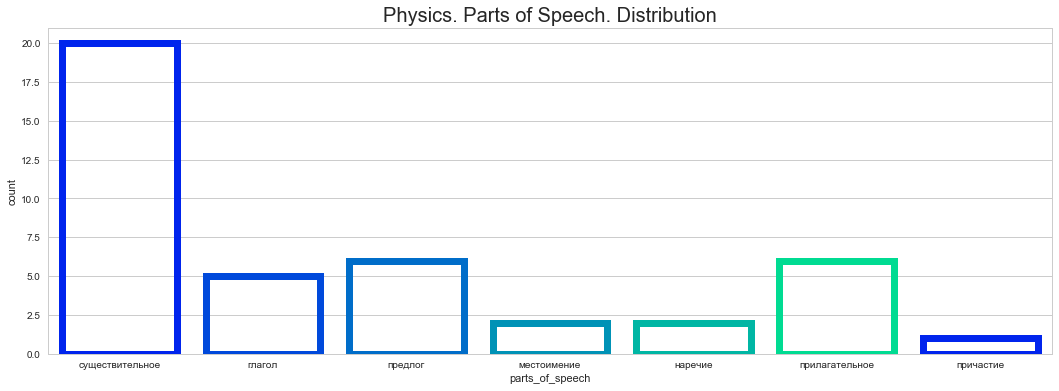

In [62]:
hide_code
# Create the dataframe
df_physics = pandas.DataFrame({'parts_of_speech': parts_of_speech_physics,
                               'words': words_physics})
# Plot distribution
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", data=df_physics,
                  facecolor=(0, 0, 0, 0), linewidth=7,
                  edgecolor=seaborn.color_palette("winter"))
plt.title('Physics. Parts of Speech. Distribution', fontsize=20);

## Step 2. Preprocess

In [63]:
hide_code
# Create vocabulary
def create_lookup_tables(text):
    vocabulary = set(text)
    int_to_vocab = dict(enumerate(vocabulary))
    vocab_to_int = dict((v,k) for k,v in int_to_vocab.items())
    
    return vocab_to_int, int_to_vocab

In [64]:
hide_code
# Russian
vocab_to_int_russian, int_to_vocab_russian = create_lookup_tables(words_russian)
int_text_russian = [vocab_to_int_russian[word] for word in words_russian]
print(int_text_russian[:7])
print(words_russian[:7])

[482, 10, 232, 473, 219, 531, 275]
['археологи' 'находят' 'в' 'славянских' 'землях' 'много' 'кладов']


In [65]:
hide_code
# Russian
part_to_int_russian, int_to_part_russian = create_lookup_tables(parts_of_speech_russian)
int_parts_russian = [part_to_int_russian[part] for part in parts_of_speech_russian]
print(int_parts_russian[:7])
print(parts_of_speech_russian[:7])

[0, 8, 9, 5, 0, 3, 0]
['существительное' 'глагол' 'предлог' 'прилагательное' 'существительное'
 'числительное' 'существительное']


In [66]:
hide_code
# Physics
vocab_to_int_physics, int_to_vocab_physics = create_lookup_tables(words_physics)
int_text_physics = [vocab_to_int_physics[word] for word in words_physics]
print(int_text_physics[:7])
print(words_physics[:7])

[1, 5, 4, 36, 12, 29, 30]
['понятиями' 'физики' 'пользуются' 'в' 'любом' 'разделе' 'естествознания']


In [67]:
hide_code
# Physics
part_to_int_physics, int_to_part_physics = create_lookup_tables(parts_of_speech_physics)
int_parts_physics = [part_to_int_physics[part] for part in parts_of_speech_physics]
print(int_parts_physics[:7])
print(parts_of_speech_physics[:7])

[0, 0, 4, 5, 3, 0, 0]
['существительное' 'существительное' 'глагол' 'предлог' 'местоимение'
 'существительное' 'существительное']


In [68]:
hide_code
# Russian
place_in_sentence_russian = numpy.tile(numpy.array(range(7)), len(data_russian['sentences']))
place_in_sentence_russian.shape

(770,)

In [69]:
hide_code
# Physics
place_in_sentence_physics = numpy.tile(numpy.array(range(7)), len(data_physics['sentences']))
place_in_sentence_physics.shape

(42,)

In [70]:
hide_code
# Russian
df_russian['word_labels'] = int_text_russian
df_russian['part_labels'] = int_parts_russian
df_russian['place_in_sentence'] = place_in_sentence_russian
df_russian.head()

,parts_of_speech,words,word_labels,part_labels,place_in_sentence
0,существительное,археологи,482,0,0
1,глагол,находят,10,8,1
2,предлог,в,232,9,2
3,прилагательное,славянских,473,5,3
4,существительное,землях,219,0,4


In [71]:
hide_code
# Physics
df_physics['word_labels'] = int_text_physics
df_physics['part_labels'] = int_parts_physics
df_physics['place_in_sentence'] = place_in_sentence_physics
df_physics.head()

,parts_of_speech,words,word_labels,part_labels,place_in_sentence
0,существительное,понятиями,1,0,0
1,существительное,физики,5,0,1
2,глагол,пользуются,4,4,2
3,предлог,в,36,5,3
4,местоимение,любом,12,3,4


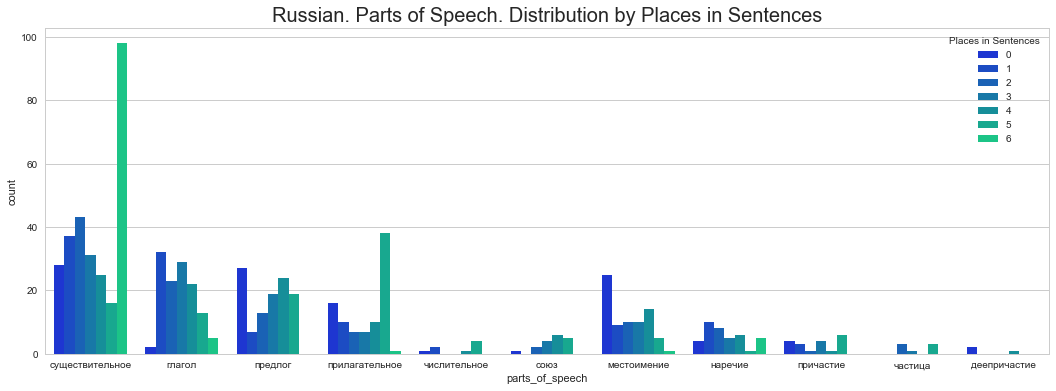

In [72]:
hide_code
# Plot distribution / Russian
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", hue='place_in_sentence',
                  data=df_russian, palette='winter')
plt.legend(loc=1, title="Places in Sentences")
plt.title('Russian. Parts of Speech. Distribution by Places in Sentences', fontsize=20);

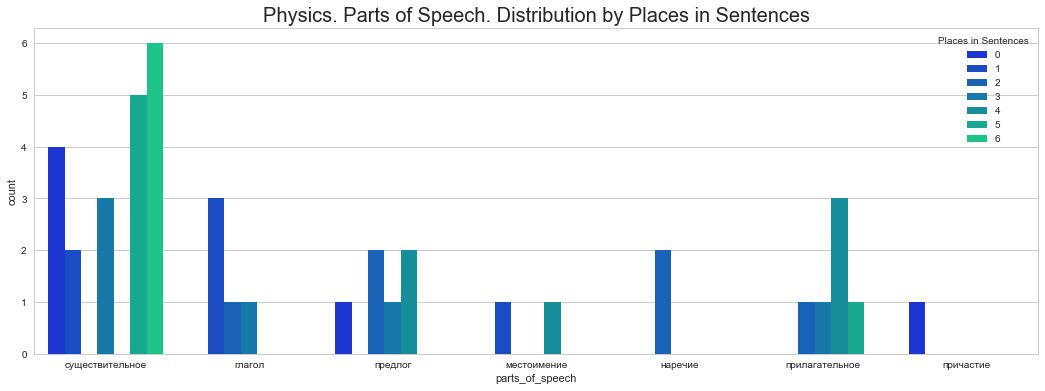

In [73]:
hide_code
# Plot distribution / Physics
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", hue='place_in_sentence',
                  data=df_physics, palette='winter')
plt.legend(loc=1, title="Places in Sentences")
plt.title('Physics. Parts of Speech. Distribution by Places in Sentences', fontsize=20);

In [74]:
hide_code
# Russian
word_lengths_russian = numpy.array([len(i) for i in words_russian])
df_russian['word_lengths'] = word_lengths_russian

In [75]:
hide_code
# Physics
word_lengths_physics = numpy.array([len(i) for i in words_physics])
df_physics['word_lengths'] = word_lengths_physics

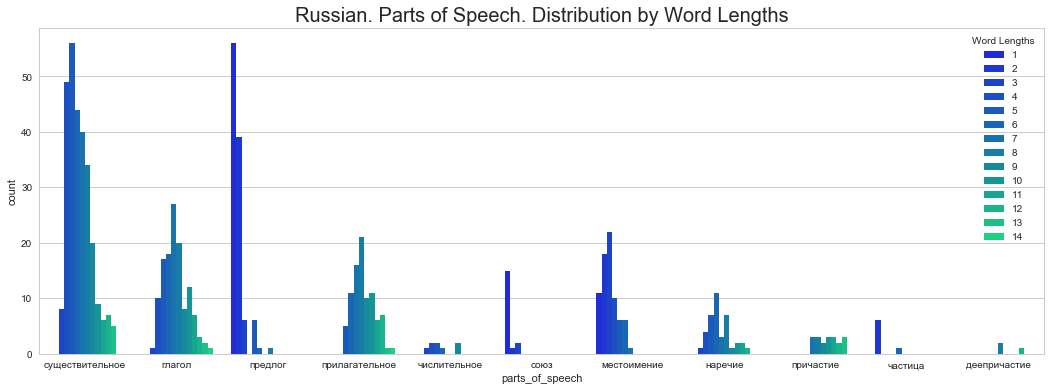

In [76]:
hide_code
# Plot distribution / Russian
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", hue='word_lengths',
                  data=df_russian, palette='winter')
plt.legend(loc=1, title="Word Lengths")
plt.title('Russian. Parts of Speech. Distribution by Word Lengths', fontsize=20);

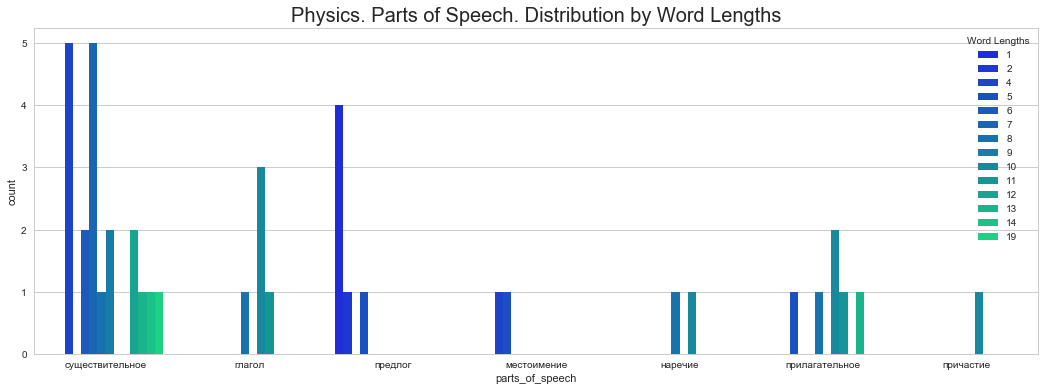

In [77]:
hide_code
# Plot distribution / Physics
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", hue='word_lengths',
                  data=df_physics, palette='winter')
plt.legend(loc=1, title="Word Lengths")
plt.title('Physics. Parts of Speech. Distribution by Word Lengths', fontsize=20);

In [78]:
hide_code
# Word occurrences in sentences / Russian
vectorizer_russian = CountVectorizer(analyzer = "word", tokenizer = None, 
                                     preprocessor = None, stop_words = None,
                                     min_df = 0, max_features = 700) 

data_features_russian = vectorizer_russian.fit_transform([' '.join(words_russian)])
vocabulary_russian = vectorizer_russian.get_feature_names()
word_occurrences_russian = numpy.sum(data_features_russian.toarray(), axis=0)

print(data_features_russian.shape)
print(vocabulary_russian[:100])
print(word_occurrences_russian[:100])

(1, 610)
['автобус', 'аисты', 'активно', 'актёры', 'алмазной', 'амфору', 'археологи', 'асфальта', 'асфальте', 'бабушка', 'багровея', 'без', 'безнадёжность', 'безопасность', 'белые', 'белье', 'берега', 'бесконечные', 'бледным', 'блеснул', 'бобров', 'бойцам', 'большого', 'большое', 'большой', 'борт', 'бортом', 'будет', 'буря', 'была', 'быстро', 'важно', 'варил', 'вашему', 'вдохновение', 'верно', 'вернулся', 'весело', 'ветвей', 'ветер', 'ветровые', 'вечерами', 'вешняя', 'взял', 'видим', 'видимого', 'вниз', 'внутренний', 'внутрь', 'во', 'вовремя', 'вода', 'воде', 'воды', 'воздуха', 'воздухе', 'возле', 'возможно', 'войском', 'волны', 'вольерах', 'восемь', 'воспоминания', 'восприятию', 'восторженной', 'время', 'все', 'всегда', 'всей', 'вскакивал', 'встречи', 'выбегал', 'выбросили', 'выглядывали', 'выражается', 'вьётся', 'газового', 'главной', 'глаз', 'глядело', 'головы', 'голос', 'голубоватыми', 'гомонящая', 'горизонту', 'город', 'городской', 'гром', 'громадный', 'громко', 'груды', 'далеко',

In [79]:
hide_code
# Word occurrences in sentences / Physics
vectorizer_russian = CountVectorizer(analyzer = "word", tokenizer = None, 
                                     preprocessor = None, stop_words = None,
                                     min_df = 0, max_features = 700) 

data_features_physics = vectorizer_physics.fit_transform([' '.join(words_physics)])
vocabulary_physics = vectorizer_physics.get_feature_names()
word_occurrences_physics = numpy.sum(data_features_physics.toarray(), axis=0)

print(data_features_physics.shape)
print(vocabulary_physics[:100])
print(word_occurrences_physics[:100])

(1, 36)
['вами', 'возникновении', 'вступило', 'выработаны', 'естествознания', 'исследования', 'картина', 'любом', 'люди', 'методов', 'мира', 'мифы', 'на', 'наиболее', 'научного', 'общая', 'основы', 'перед', 'подходящих', 'познания', 'пользуются', 'понятиями', 'постепенно', 'предстанет', 'придумывали', 'природы', 'приступили', 'путь', 'разделе', 'разнообразные', 'физики', 'физическими', 'физических', 'человечество', 'экспериментированию', 'явлениями']
[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]


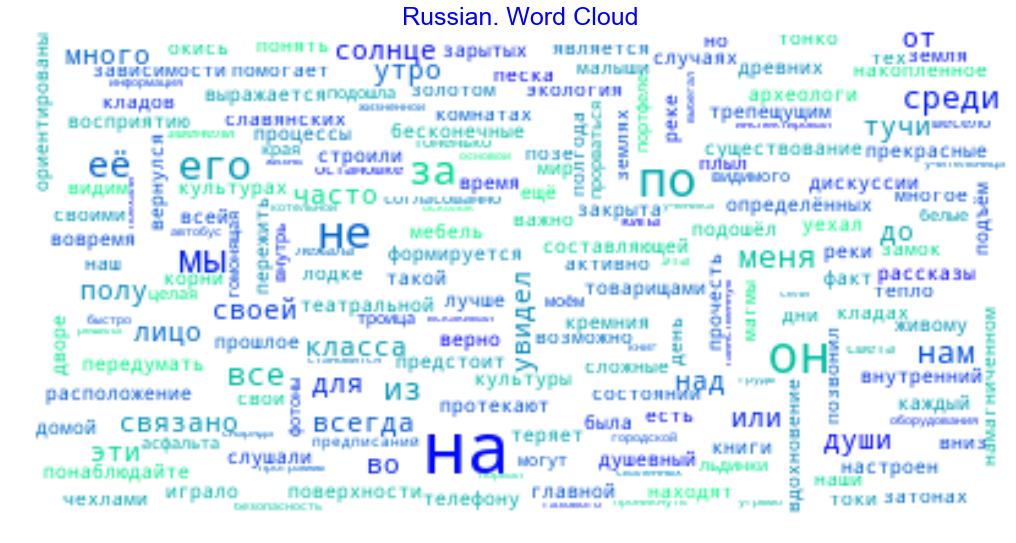

In [85]:
hide_code
# Display word occurrences / Russian
wordcloud_russian = WordCloud(max_font_size=30, 
                              background_color='white',
                              colormap=cm.winter).generate(' '.join(words_russian))
plt.figure(figsize=(18,9))
plt.imshow(wordcloud_russian, interpolation="bilinear")
plt.title("Russian. Word Cloud", fontsize=25, color = 'b')
plt.axis("off");

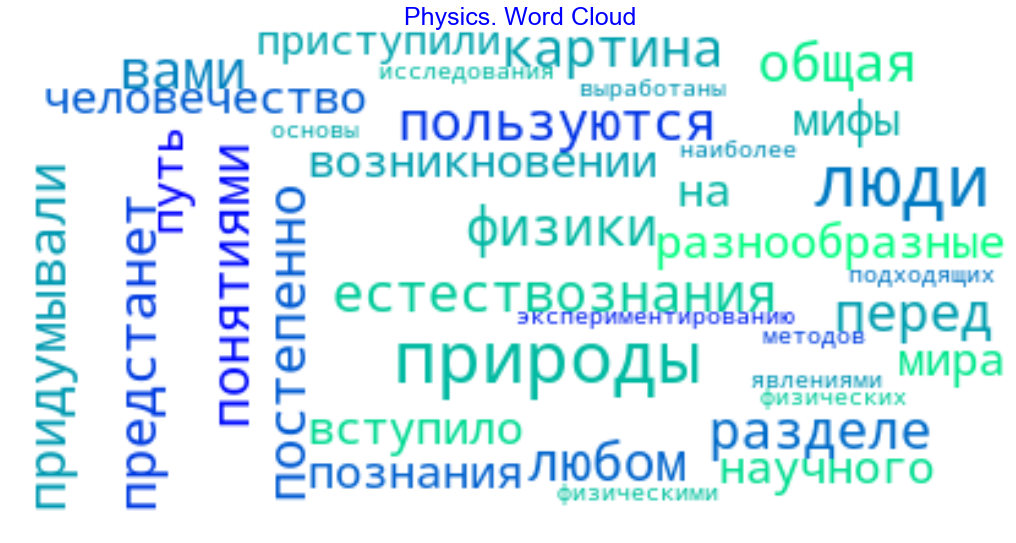

In [86]:
hide_code
# Display word occurrences / Physics
wordcloud_physics = WordCloud(max_font_size=30, 
                              background_color='white',
                              colormap=cm.winter).generate(' '.join(words_physics))
plt.figure(figsize=(18,9))
plt.imshow(wordcloud_physics, interpolation="bilinear")
plt.title("Physics. Word Cloud", fontsize=25, color = 'b')
plt.axis("off");